In [1]:
#import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [2]:
city_file = os.path.join("raw_data", "city_data.csv")
ride_file = os.path.join("raw_data" , "ride_data.csv")

raw_city_data_df = pd.read_csv(city_file)
raw_ride_data_df = pd.read_csv(ride_file)





In [3]:
#merge tables on city
#raw_city_data_df.drop_duplicates(inplace = True)

merged_raw_df = raw_city_data_df.merge(raw_ride_data_df, on = 'city')

merged_raw_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [17]:
grouped_merged_raw = merged_raw_df.groupby(["city"])

grouped_merged_raw
#Average fare per city
average_fare_city = grouped_merged_raw["fare"].mean()
#average_fare_city

#total rides per city
tRides_city = grouped_merged_raw["city"].count()
#tRides_city


#total number of drivers per city
tDrivers_city = grouped_merged_raw["driver_count"].count()
tDrivers_city

#city type
city_type = grouped_merged_raw["type"].unique()
city_type



#dataframe time
scatter_plot_df = pd.DataFrame({"Average Fare": average_fare_city,
                                "Total Rides": tRides_city,
                                "Total Drivers": tDrivers_city,
                                "City Type": city_type})
scatter_plot_df.head()
                    

rural = scatter_plot_df[scatter_plot_df["City Type"]== "Rural"]
suburban = scatter_plot_df[scatter_plot_df["City Type"] == "Suburban"]
urban = scatter_plot_df[scatter_plot_df["City Type"] == "Urban"]



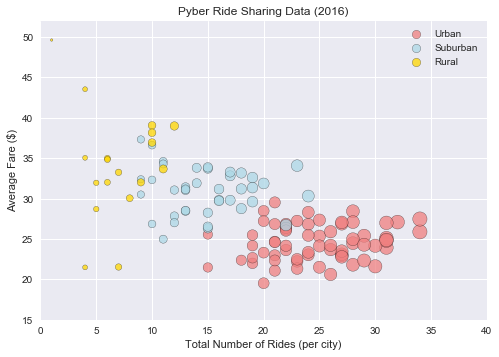

In [19]:

plt.grid(color="white")

#urban
urban_plot = plt.scatter(urban['Total Rides'], urban['Average Fare'], s = urban['Total Drivers']*6, color = 'lightcoral', edgecolor = 'black',
        label = 'Urban', alpha = .75)

suburban_plot = plt.scatter(suburban['Total Rides'], suburban['Average Fare'], s = suburban['Total Drivers']*6, color = 'lightblue', edgecolor = 'black',
        label = 'Suburban', alpha = .75)


rural_plot = plt.scatter(rural['Total Rides'], rural['Average Fare'], s = rural['Total Drivers']*6, color = 'gold', edgecolor = 'black',
        label = 'Rural', alpha = .75)

plt.xlim(0, 40)
plt.ylim(15,52)

lgnd = plt.legend(loc='best')
lgnd.legendHandles[0]._sizes = [70]
lgnd.legendHandles[1]._sizes = [70]
lgnd.legendHandles[2]._sizes = [70]

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")

plt.show()

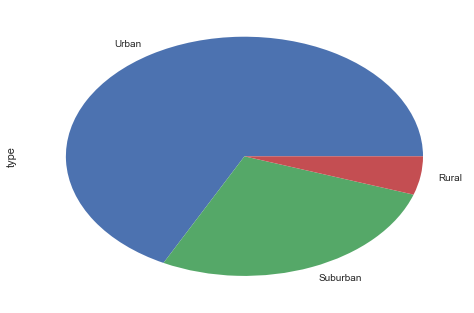

In [71]:
'''plt.pie(percentage_sales, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140, labels=labels)

plt.title("Percentage of Total Sales by Borough (2017)")

plt.# Percentage of Total Sales by Boroughaxis("equal")

fig = plt.gcf()
fig.set_size_inches(10,10)

plt.savefig("percenttotalsales.png")

plt.show()'''

pi_df = pd.DataFrame(data= merged_raw_df, columns = {"type","fare"})

pi_df_final = pi_df["type"].value_counts()


#pi1_df = pd.DataFrame({"Urban":u_city_final,"Suburban":s_city_final,"Rural":r_city_final})
pi_df_final.plot.pie()
plt.show()
#pi_df_final

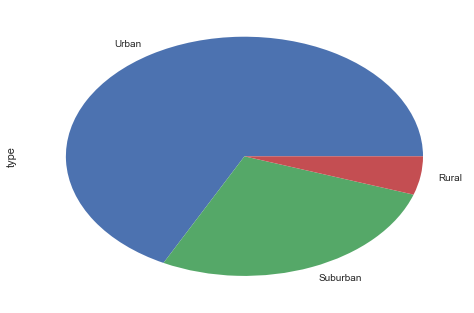

In [73]:
pi_2_df = pd.DataFrame(data= merged_raw_df, columns = {"type","rides"})
pi_2_df_final = pi_2_df["type"].value_counts()


pi_2_df_final.plot.pie()
plt.show()